In [14]:
import redback
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from redback.simulate_transients import SimulateGenericTransient

In [7]:
#tophat + two component
def combined_signal(time, redshift, av, bands, num_points, noise, thv, loge0, thc, logn0, p, logepse, logepsb, ksin, g0, mej1, mej2,
                   vej1, vej2, kappa1, kappa2, temp_floor1, temp_floor2 ):
    """
    Function to combine afterglow and kilonova model flux densities
    Time specified is max time
    """
    frequency = np.array(redback.utils.bands_to_frequency(bands))
    times= np.linspace(0.01,time,100)
    
    model_kwargs = {'output_format':'flux_density', 'frequency':frequency}
    
    afterglow_params={}
    afterglow_params['base_model']= 'tophat'
    afterglow_params['redshift'] = redshift
    afterglow_params['av'] = av
    afterglow_params['loge0'] = loge0
    afterglow_params['logn0'] = logn0 
    afterglow_params['p'] = p
    afterglow_params['logepse'] = logepse
    afterglow_params['logepsb'] = logepsb
    afterglow_params['ksin'] = ksin
    afterglow_params['g0'] = g0
    afterglow_params['thv']= thv
    afterglow_params['thc'] = thc
    
    kilonova_params={}
    kilonova_params['base_model']= 'two_component_kilonova_model'
    kilonova_params['redshift'] = redshift
    kilonova_params['av']= av
    kilonova_params['mej_1'] = mej1
    kilonova_params['temperature_floor_1'] = temp_floor1 #min temp of expanding photosphere
    kilonova_params['kappa_1'] = kappa1 
    kilonova_params['vej_1'] = vej1
    kilonova_params['mej_2'] = mej2 
    kilonova_params['temperature_floor_2'] = temp_floor2 
    kilonova_params['kappa_2'] = kappa2
    kilonova_params['vej_2'] = vej2
    
    afterglow_obs= SimulateGenericTransient(model='extinction_with_afterglow_base_model', parameters=afterglow_params,
                                            times=times, data_points=num_points, model_kwargs=model_kwargs, 
                                            multiwavelength_transient=True, noise_term=noise)

    kn_obs= SimulateGenericTransient(model='extinction_with_kilonova_base_model', parameters=kilonova_params,times=times, 
                                     data_points=num_points, model_kwargs=model_kwargs, multiwavelength_transient=True,
                                     noise_term=noise)
    
    merged_data = pd.concat([afterglow_obs.data, kn_obs.data],ignore_index=True)
    print(merged_data)
    
    transient = redback.transient.Transient(name='my_transient', flux_density=merged_data['output'].values,
                                      time=merged_data['time'].values, data_mode='flux_density',
                                      flux_density_err=merged_data['output_error'].values, frequency=merged_data['frequency'].values)
    return transient


         time     frequency   true_output        output  output_error
0    1.524848  3.087381e+14  1.591657e-14  1.557847e-14  7.958287e-16
1    2.534747  3.972879e+14  3.136980e-13  3.442031e-13  1.568490e-14
2    4.554545  6.210931e+14  4.594108e-12  4.330749e-12  2.297054e-13
3    4.554545  3.087381e+14  1.941276e-11  1.742908e-11  9.706378e-13
4    4.554545  3.087381e+14  1.941276e-11  1.844052e-11  9.706378e-13
..        ...           ...           ...           ...           ...
95  39.901010  3.972879e+14  2.754183e-04  2.637768e-04  1.377092e-05
96  42.930707  6.210931e+14  2.811465e-06  2.813915e-06  1.405732e-07
97  42.930707  3.087381e+14  1.375376e-03  1.317873e-03  6.876882e-05
98  44.950505  3.449498e+14  7.482138e-04  7.234519e-04  3.741069e-05
99  45.960404  3.087381e+14  1.403603e-03  1.327599e-03  7.018013e-05

[100 rows x 5 columns]


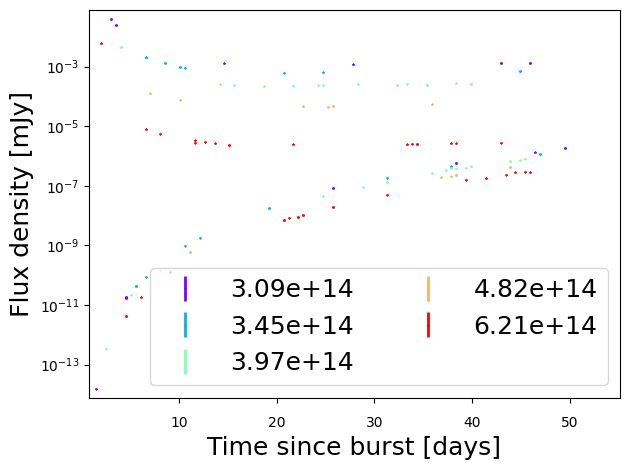

<Axes: xlabel='Time since burst [days]', ylabel='Flux density [mJy]'>

In [12]:
bands = ['lsstg', 'lsstr', 'lssti','lsstz','lssty']
transient= combined_signal(50, 0.01, 1, bands, 50, 0.05, 0.5, 52.5, 0.01, -2, 2.1, -1, -1, 0.4, 1000.0, 0.015, 0.01,
                           0.1, 0.2, 1.0, 25.0, 2000, 2000)

transient.plot_data(filters=transient.unique_frequencies)


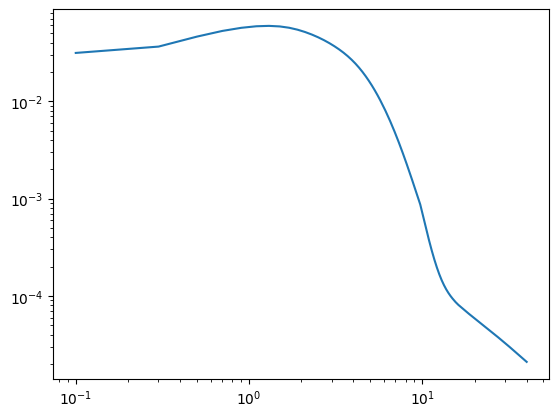

In [49]:
time=np.linspace(0.1,40,200)

flux=redback.transient_models.combined_models.tophat_and_twolayerstratified(time,redshift=0.01,av=0.5,thv=0.4, loge0=49.5, thc=0.6, 
            logn0=-0.5, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=1, g0=1000, mej=0.03, output_format='flux_density', frequency=4e14,
            kappa=3, beta=4, vej_1=0.1, vej_2=0.4)

ax= plt.subplot()
ax.loglog(time,flux)
plt.show()

In [41]:
times= np.linspace(0.1,40,200)
num_points=500
noise=0.05

bands = ['F160W', 'F110W','lssty', 'lsstz','lssti', 'lsstr','lsstg','lsstu', 'uvot::uvw1']
frequencies=[5e9, 2e17]
bandfreqs = (redback.utils.bands_to_frequency(bands))
print(bandfreqs)
frequencies.extend(bandfreqs)
frequencies.sort()
frequencies

model_kwargs = {'output_format':'flux_density', 'frequency':frequencies}

params={}
params['redshift'] = 0.01
params['av'] = 0.5
params['loge0'] = 49.5
params['logn0'] = 0.5 
params['p'] = 2.3
params['logepse'] = -1.25
params['logepsb'] = -2.5
params['ksin'] = 1
params['g0'] = 1000
params['thv']= 0.5
params['thc'] = 0.6
params['mej']=0.03
params['vej_1']=0.1
params['vej_2']=0.4
params['kappa']=2
params['beta']=4
    
combined_model =  SimulateGenericTransient(model='tophat_and_twolayerstratified', parameters=params,
                                            times=times, data_points=num_points, model_kwargs=model_kwargs, 
                                            multiwavelength_transient=True, noise_term=noise)
combined_model.data

[1.94770377e+14 2.57913110e+14 3.08738117e+14 3.44949775e+14
 3.97287891e+14 4.81730482e+14 6.21093083e+14 8.16711950e+14
 1.14683976e+15]


,time,frequency,true_output,output,output_error
0,0.100000,2.000000e+17,0.000000,0.000000,0.000000e+00
1,0.100000,3.449498e+14,0.100515,0.098936,5.025772e-03
2,0.100000,5.000000e+09,12.971951,13.248842,6.485975e-01
3,0.100000,2.000000e+17,0.000000,0.000000,0.000000e+00
4,0.300503,2.000000e+17,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...
495,39.598995,5.000000e+09,0.034623,0.037032,1.731129e-03
496,40.000000,6.210931e+14,0.000010,0.000010,4.829045e-07
497,40.000000,1.947704e+14,0.000033,0.000034,1.668582e-06
498,40.000000,2.000000e+17,0.000000,0.000000,0.000000e+00


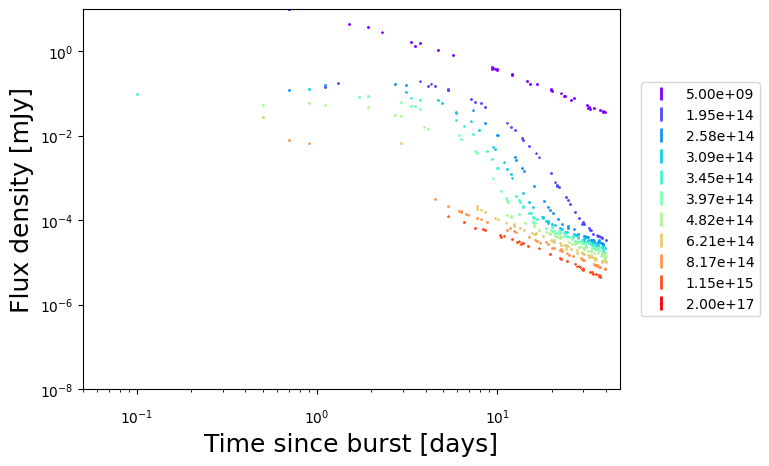

In [51]:
transient = redback.transient.Transient(name='my_transient', flux_density=combined_model.data['output'].values,
                                      time=combined_model.data['time'].values, data_mode='flux_density',
                                      flux_density_err=combined_model.data['output_error'].values, frequency=combined_model.data['frequency'].values)
    
ax= transient.plot_data(filters=transient.unique_frequencies, show=False)
ax.set_ylim(10e-9,10)
ax.loglog()
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5))
plt.show()

In [63]:
model='two_layer_stratified_kilonova'
injection_parameters= params
model_kwargs = dict(frequency=transient.unique_frequencies, output_format='flux_density')
priors = redback.priors.get_priors(model=model)
priors['redshift']=0.01
priors

{'redshift': 0.01,
 'mej': Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}[M_{\\odot}]$', unit=None, boundary=None),
 'vej_1': Uniform(minimum=0.05, maximum=0.2, name='vej_1', latex_label='$v_{\\mathrm{ej}-1}[c]$', unit=None, boundary=None),
 'vej_2': Uniform(minimum=0.3, maximum=0.5, name='vej_2', latex_label='$v_{\\mathrm{ej}-2}[c]$', unit=None, boundary=None),
 'kappa': Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa$', unit=None, boundary=None),
 'beta': Uniform(minimum=1.5, maximum=8, name='beta', latex_label='$\\beta$', unit=None, boundary=None)}

In [64]:
model_kwargs['frequency']

array([5.00000000e+09, 1.94770377e+14, 2.57913110e+14, 3.08738117e+14,
       3.44949775e+14, 3.97287891e+14, 4.81730482e+14, 6.21093083e+14,
       8.16711950e+14, 1.14683976e+15, 2.00000000e+17])

In [62]:
result = redback.fit_model(transient=transient, model=model, sampler='dynesty', model_kwargs=model_kwargs,
                           prior=priors, sample='rslice', nlive=1000, plot=False, resume=True, injection_parameters=injection_parameters)


TypeError: argument of type 'NoneType' is not iterable